## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from scipy import stats

## Loading Files

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
dfc = df_train.copy()

In [4]:
dfc.head(4)

,season,date,league_id,league,Team 1,Team2,SPI1,SPI2,proj_score1,proj_score2,...,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,Outcome
0,2019,01/03/19,1979,Chinese Super League,Shandong Luneng,Guizhou Renhe,48.22,37.83,1.75,0.84,...,22.1,1.0,0.0,1.39,0.26,2.05,0.54,1.05,0.00,1
1,2019,01/03/19,1979,Chinese Super League,Shanghai Greenland,Shanghai SIPG,39.81,60.08,1.22,1.89,...,63.4,0.0,4.0,0.57,2.76,0.80,1.50,0.00,3.26,0
2,2019,01/03/19,1979,Chinese Super League,Guangzhou Evergrande,Tianjin Quanujian,65.59,39.99,2.58,0.62,...,28.8,3.0,0.0,0.49,0.45,1.05,0.75,3.15,0.00,1
3,2019,01/03/19,1979,Chinese Super League,Wuhan Zall,Beijing Guoan,32.25,54.82,1.10,1.79,...,58.9,0.0,1.0,1.12,0.97,1.51,0.94,0.00,1.05,0


In [5]:
dfc.shape

(7443, 21)

In [6]:
dfc.columns

Index(['season', 'date', 'league_id', 'league', 'Team 1', 'Team2', 'SPI1',
       'SPI2', 'proj_score1', 'proj_score2', 'importance1', 'importance2',
       'score1', 'score2', 'xg1', 'xg2', 'nsxg1', 'nsxg2', 'adj_score1',
       'adj_score2', 'Outcome'],
      dtype='object')

## About The Dataset

* **season:**  year of league.
* **date:**  On what date did the game fall? 
* **league_id:**  A code that represents the league that the game was played in.
* **league:**  The human-readable name of the league.
* **Team 1:**  One of the teams that played. 
* **Team2:**  The other team that played.
* **SPI1:**  The "soccer power index" of team1. This is basically a measure of how good a team is. This is the value of the index at the time of the match, and changes over time.
* **SPI2:**  The "soccer power index" of team2.
* **proj_score1:**  Projected score of team1.The number of goals that each team would need to score to keep its offensive rating exactly the same as it was going into the match.
* **proj_score2:**  Projected score of team2.
* **importance1:**  This is a measure of the importance of the match for team1. There are certain matches that can be of greater or lesser importance for teams, depending on their standings. For example, if you are really close to being in 3rd place, but are currently in 4th, this may be a very important game for you.
* **importance2:**  The importance of the match for team2. 
* **score1:**  The final score (the thing we will be trying to predict).
* **score2:**  The final score of team2 (the other thing we’re trying to predict).
* **xg1:**  Expected goals of team1. This is a measure of the expected number of goals based on the total number of shots, location of the shots, etc. for team1. If, for example, someone was in front of an open goal, and they sliced the ball, this would likely be counted as an expected goal, but of course would not be an actual goal.
* **xg2:**  Expected goals of team2.
* **nsxg1:**  Non-shot expected goals. This is a measure of the expected probability of a goal given the state of the field. For example, if the ball is intercepted directly in front of the goal, but a shot is not taken, then a small value will be added here. 
* **nsxg2:**  Non-shot expected goals for team2.
* **adj_score1:**  This is the score given to team1 after the game is finished plus style points.
* **adj_score2:**  Adjusted score for team2.
* **outcome:** result of winning.If 1, team1 will win, if 0 team2 will win.


In [7]:
#Dropping duplicate rows (if present)
dfc.drop_duplicates(inplace=True)

In [8]:
dfc.shape

(7443, 21)

* There were no duplicate rows.

In [9]:
dfc.isnull().sum()

season            0
date              0
league_id         0
league            0
Team 1            0
Team2             0
SPI1              0
SPI2              0
proj_score1       0
proj_score2       0
importance1    4916
importance2    4916
score1         4800
score2         4800
xg1            5728
xg2            5728
nsxg1          5728
nsxg2          5728
adj_score1     5728
adj_score2     5728
Outcome           0
dtype: int64

* we have a lot of missing values in several columns.

In [10]:
dfc.describe()

,season,league_id,SPI1,SPI2,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,Outcome
count,7443.000000,7443.000000,7443.000000,7443.000000,7443.000000,7443.000000,2527.000000,2527.000000,2643.000000,2643.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,7443.000000
mean,2020.846702,2264.435980,40.447416,40.486339,1.464127,1.204017,32.668421,31.957776,1.482785,1.196746,1.462035,1.169376,1.360292,1.108700,1.510140,1.230000,0.681177
std,0.440811,1033.343797,18.367631,18.356843,0.368777,0.365576,24.626346,24.536147,1.241164,1.109059,0.793232,0.709431,0.621730,0.561853,1.226182,1.106616,0.466052
min,2019.000000,1818.000000,4.710000,4.720000,0.430000,0.200000,0.000000,0.000000,0.000000,0.000000,0.060000,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,1859.000000,28.010000,27.990000,1.220000,0.960000,16.450000,15.950000,1.000000,0.000000,0.880000,0.640000,0.900000,0.710000,1.050000,0.000000,0.000000
50%,2021.000000,1948.000000,38.260000,38.290000,1.410000,1.150000,25.200000,24.400000,1.000000,1.000000,1.350000,1.050000,1.290000,1.020000,1.050000,1.050000,1.000000
75%,2021.000000,2160.000000,52.160000,52.380000,1.660000,1.390000,42.500000,40.600000,2.000000,2.000000,1.915000,1.565000,1.700000,1.390000,2.100000,2.100000,1.000000
max,2021.000000,9541.000000,93.990000,94.740000,3.540000,3.200000,100.000000,100.000000,7.000000,6.000000,5.470000,4.670000,5.010000,4.620000,7.340000,6.110000,1.000000


In [11]:
for i in dfc.columns:
    print('Unique values in {} are {}'.format(i,len(dfc[i].unique())))

Unique values in season are 3
Unique values in date are 424
Unique values in league_id are 39
Unique values in league are 39
Unique values in Team 1 are 657
Unique values in Team2 are 657
Unique values in SPI1 are 2516
Unique values in SPI2 are 2514
Unique values in proj_score1 are 248
Unique values in proj_score2 are 242
Unique values in importance1 are 702
Unique values in importance2 are 701
Unique values in score1 are 9
Unique values in score2 are 8
Unique values in xg1 are 334
Unique values in xg2 are 306
Unique values in nsxg1 are 286
Unique values in nsxg2 are 254
Unique values in adj_score1 are 150
Unique values in adj_score2 are 105
Unique values in Outcome are 2


<AxesSubplot:>

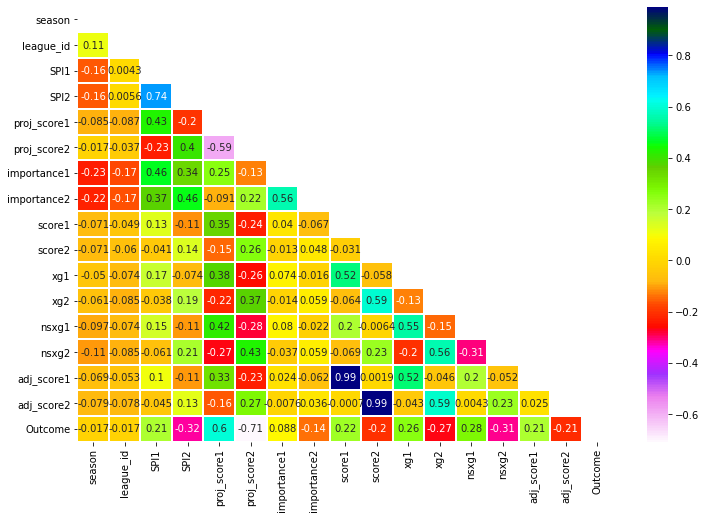

In [12]:
plt.figure(figsize=(12,8))
mask =  np.triu(np.ones_like(dfc.corr()))
sns.heatmap(dfc.corr(),mask=mask,annot=True,cmap='gist_ncar_r',linewidth=0.2)

**INSIGHTS:**
* score1 and score2 are highly correlated with adj_score1 and adj_score2 respectively.
* SPI1 and SPI2 are also 74% correlated.

### Dropping unnecessary features

1. 'score1' & 'score2' are the final scores which are something to be predicted based on other features so it cannot be the feature that will help us in prediction. So, I will remove it. 
2. 'xg' and 'nsxg' of a team are the features which cant be known before the game. This can be predicted during the game. So, I will remove these features.
3. Also, SPI1 and SPI2 are 74% correlated so I will drop SPI1 (note: you can also drop SPI2 instead of SPI1).
4. 'adj_score' features are highly correlated with 'score' so we will drop these as well.
5. we will drop 'season', 'date','league' & 'league_id' because these are not contributing in the model building.
6. Also the team names will not contribute in the model building so we will drop these columns as well.
7. Also we will drop 'importance1' and 'importance2' features due to a lot of missing values(more than half of the given data)

In [13]:
dfc.drop(columns = ['season','date','league_id','league','Team 1','Team2','SPI1','importance1','importance2','score1','score2',
                    'xg1','xg2','nsxg1','nsxg2','adj_score1','adj_score2'],inplace = True)

In [14]:
dfc.head(4)

,SPI2,proj_score1,proj_score2,Outcome
0,37.83,1.75,0.84,1
1,60.08,1.22,1.89,0
2,39.99,2.58,0.62,1
3,54.82,1.10,1.79,0


c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

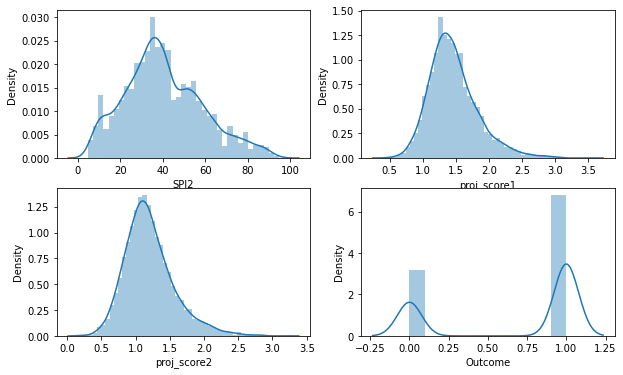

In [15]:
# visualizing distribution

plt.figure(figsize=(10,6))
for i, col in enumerate(dfc.columns):
    if dfc[col].dtype != 'object':
        ax = plt.subplot(2, 2, i+1)
        sns.distplot(dfc[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

In [16]:
# Dropping duplicate rows if present after removing some features.
dfc.drop_duplicates(inplace=True)

In [17]:
dfc.shape

(7375, 4)

* Some of the duplicate rows are deleted.

## Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sd =StandardScaler()
col_to_be_std = ['SPI2','proj_score1','proj_score2']
dfc[col_to_be_std]= sd.fit_transform(dfc[col_to_be_std])

In [19]:
# checking the transformed dataset
dfc.head(4)

,SPI2,proj_score1,proj_score2,Outcome
0,-0.153492,0.772555,-0.993817,1
1,1.061902,-0.661810,1.873742,0
2,-0.035503,3.018824,-1.594639,1
3,0.774577,-0.986571,1.600641,0


## Handling Test Data

In [20]:
dft = df_test.copy()

In [21]:
dft.drop(columns = ['season','date','league_id','league','Team 1','Team2','SPI1','importance1','importance2','score1','score2'
                    ,'xg1','xg2','nsxg1','nsxg2','adj_score1','adj_score2'],inplace = True)

In [22]:
col_to_be_std = ['SPI2','proj_score1','proj_score2']
dft[col_to_be_std]= sd.fit_transform(dft[col_to_be_std])

In [23]:
dft

,SPI2,proj_score1,proj_score2
0,1.535373,0.600180,-0.098964
1,1.392656,-0.287251,-0.685927
2,1.407807,-0.758699,0.739555
3,1.779751,0.184196,0.599802
4,2.098421,-1.396540,1.941432
...,...,...,...
4003,0.267538,-0.148590,0.460049
4004,-0.445558,-0.786431,-0.126915
4005,-0.684072,-0.398180,-0.238717
4006,-0.602449,-0.342716,-0.993384


## Training the model

In [24]:
x = dfc.drop('Outcome',axis=1)
y = dfc['Outcome']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

#### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
pred_log = logreg.predict(x_test)
acc_log = round(metrics.accuracy_score(y_test,pred_log) * 100, 3)
print('Accuracy using Logistic Regression:',acc_log)

Accuracy using Logistic Regression: 99.638


In [26]:
from sklearn.metrics import log_loss
print(log_loss(y_test,pred_log))

0.12486028393190193


#### Support Vector Classifier

In [27]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
acc_svc = round(metrics.accuracy_score(y_test,pred_svc) * 100, 3)
print('Accuracy using Support Vector Classifier:',acc_svc)

Accuracy using Support Vector Classifier: 99.367


In [28]:
print(log_loss(y_test,pred_svc))

0.21850504523293443


#### K Neighbour Classifier

Text(0, 0.5, 'accuracy_rate')

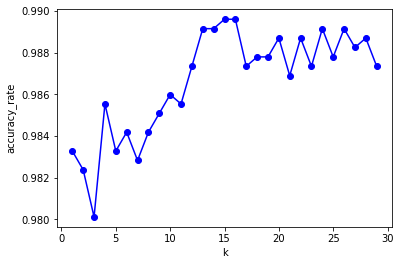

In [29]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_rate = []
from sklearn import metrics
for i in range (1,30):
    knn = KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    pred_knn = knn.predict(x_test)
    accuracy_rate.append(metrics.accuracy_score(y_test,pred_knn))

plt.plot(range(1,30),accuracy_rate,'b-o')
plt.xlabel('k')
plt.ylabel('accuracy_rate')

In [30]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
acc_knn = round(metrics.accuracy_score(y_test,pred_knn) * 100, 3)
print('Accuracy using K Neighbour Classifier:',acc_knn)

Accuracy using K Neighbour Classifier: 98.961


In [31]:
print(log_loss(y_test,pred_knn))

0.35897074191122474


#### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
pred_decision_tree = decision_tree.predict(x_test)
acc_decision_tree  = round(metrics.accuracy_score(y_test,pred_decision_tree ) * 100, 3)
print('Accuracy using Decision Tree:',acc_decision_tree )

Accuracy using Decision Tree: 98.509


In [33]:
print(log_loss(y_test,pred_decision_tree))

0.5150425739725336


#### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=70,random_state=0)
random_forest.fit(x_train, y_train)
pred_random_forest = random_forest.predict(x_test)
acc_random_forest  = round(metrics.accuracy_score(y_test,pred_random_forest) * 100, 3)
print('Accuracy using Random Forest:',acc_random_forest )

Accuracy using Random Forest: 98.915


In [35]:
print(log_loss(y_test,pred_random_forest))

0.37457723861255793


**Insight:**
Logistic Regression has been found as the best among all the models with accuracy 99.638% and log loss as 0.124

### Predictions on given test dataset

In [46]:
predictions = logreg.predict(dft)
predictions.shape

(4008,)

In [49]:
submission = pd.read_csv('submission.csv')
submission['Outcome'] = predictions

In [50]:
subm = pd.DataFrame(predictions,columns=["Outcome"] )
subm.to_csv('./submission.csv',index=False, header=True)
submission

,Outcome
0,1
1,1
2,0
3,1
4,0
...,...
4003,1
4004,1
4005,1
4006,1
